# Derivada com ruído

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

def filtro_gaussiano_1d(S):
    sigma = S/(2*3)
    x = np.linspace(-3*sigma, 3*sigma, S)
    y = np.exp(-x**2/(2*sigma**2))
    y = y/np.sum(y)
    
    return y

### 1. Derivada da função seno com ruído

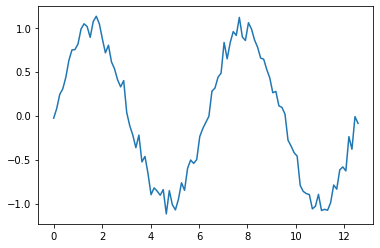

In [2]:
# Definindo a função
quant_ruido = 0.3
x = np.linspace(0, 4*np.pi, 101)
fx = np.sin(x) + quant_ruido*(np.random.rand(len(x))-0.5)
plt.plot(x, fx)

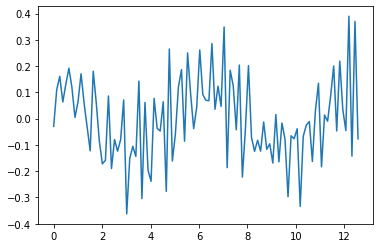

In [3]:
# Derivada
fil_der = np.array([1, -1])
dfx = convolve(fx, fil_der, mode='same')
plt.plot(x, dfx)

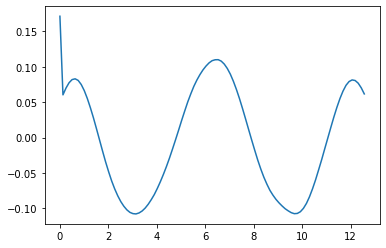

In [4]:
# Derivada após suavização do sinal
fil_suav = filtro_gaussiano_1d(25)
fx_suav = convolve(fx, fil_suav, mode='same')
dfx = convolve(fx_suav, fil_der, mode='same')
plt.plot(x, dfx)

Dois detalhes importantes são observados no gráfico acima:
1. Vemos um valor estranho para x=0
2. Mesmo se eliminarmos o valor estranho, a função resultante ainda não é um coseno

Esses efeitos ocorrem por problemas na borda do sinal. Ao realizarmos a suavização do sinal utilizando o filtro gaussiano, supomos que os valores além da borda do sinal são 0. Portanto, os valores na borda do sinal resultante são dados por uma média entre os valores do sinal original e os valores 0 adicionados além da borda. Isso faz com que a média calculada na borda seja diferente do esperado para a função seno.

Ao derivarmos o sinal, também adicionamos 0 além da borda para poder fazer a convolução. Mas o valor do sinal em x=0 é maior do que 0. Com isso, temos um valor de derivada maior do que o esperado. O mesmo problema deveria ocorrer na borda direita do sinal, mas ele não ocorre porque o filtro possui tamanho igual a 2 (um número par), então não há preenchimento com zero na borda direita.